In [1]:
from transformers import AutoTokenizer
from transformers import WordpieceTokenizer

In [2]:
# tokenizer= AutoTokenizer.from_pretrained('FPTAI/vibert-base-cased')
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

Downloading: 100%|██████████| 29.0/29.0 [00:00<00:00, 7.25kB/s]
Downloading: 100%|██████████| 625/625 [00:00<00:00, 313kB/s]
Downloading: 100%|██████████| 972k/972k [00:01<00:00, 602kB/s]  
Downloading: 100%|██████████| 1.87M/1.87M [00:01<00:00, 1.05MB/s]


In [13]:
tokenizer.add_special_tokens({"additional_special_tokens":["[unused0]","[unused1]","[unused2]"]})
tokenizer.add_special_tokens({"bos_token":"[BOS]"})
tokenizer.add_special_tokens({"eos_token":"[EOS]"})
tokenizer.add_special_tokens({"sep_token":"[SEP]"})
tokenizer.add_special_tokens({"pad_token":"[PAD]"})
tokenizer.add_special_tokens({"cls_token":"[CLS]"})
tokenizer.add_special_tokens({"mask_token":"[MASK]"})

0

In [3]:
wordpiece_tokenizer = WordpieceTokenizer(vocab=tokenizer.vocab, unk_token=tokenizer.unk_token)

In [4]:
tokenizer.special_tokens_map

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

In [5]:
type(tokenizer)

transformers.models.bert.tokenization_bert_fast.BertTokenizerFast

In [6]:
len(tokenizer)

119547

In [15]:
text = "Phòng cảnh_sát điều tra"

In [16]:
tokens = tokenizer.tokenize(text)
tokens

['Phòng', 'cảnh', '_', 'sát', 'điều', 'tra']

In [17]:
ids = tokenizer.convert_tokens_to_ids(tokens)
ids

[82419, 33266, 168, 25133, 16391, 11264]

In [18]:
tokenizer.convert_ids_to_tokens(ids)

['Phòng', 'cảnh', '_', 'sát', 'điều', 'tra']

In [68]:
tokens = wordpiece_tokenizer.tokenize(text)
tokens

['Phòng', 'cảnh', 'sát', 'điều', 'tra']

In [63]:
tokens = tokenizer.tokenize(text)
tokens

['[unused0]', 'can', '##h', 'sat', '[unused2]']

In [65]:
tokenizer.convert_tokens_to_string(tokens).split()

['[unused0]', 'Cảnh', 'sát', '[unused2]']

In [7]:
tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(ids))

'[CLS] hãng tin ria novosti của nga dẫn nguồn tin từ trang almasry_alyoum hôm_qua 195 cho biết cách đây gần hai năm vào ngày 2692014 nữ tiếp_viên ezeddin_samar của egyptair đã đăng_tải một bức ảnh kỳ_lạ trên facebook cá_nhân của cô chỉ vài tháng trước khi cô xin vào làm tại hãng . [SEP] [CLS] trong bức ảnh này ezeddin_samar mặc đồng_phục của'

In [18]:
import pickle

In [19]:
with open('bert_data/data.pkl', 'rb') as f:
    data = pickle.load(f)

In [17]:
# data[7]["src"]

In [51]:
tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(data[7]["src"]))

'[CLS] sáng 20/10, [UNK] [UNK] [UNK] [UNK] tra [UNK] [UNK] [UNK] ma [UNK], công an [UNK] đắk lắk cho biết, đang tiếp tục điều tra, xử lý 21 nam nữ thanh niên tụ tập trong quán karaoke sử dụng ma tuý bị lực lượng công an phát hiện. [SEP] [CLS] trước đó, vào [UNK] 1h [UNK] 19/10, [UNK] công [UNK] của phòng [UNK] [UNK] [UNK] [UNK] [UNK] phòng [UNK] [UNK] cơ [UNK], công an [UNK] [UNK] [UNK] tiến hành [UNK] tra [UNK] karaoke galaxy [UNK] 391 [UNK] [UNK] vương, thị xã buôn [UNK], [UNK] [UNK] [UNK]. [SEP] [CLS] tại đây, tổ công tác phát hiện [UNK] 5 [UNK] đang hát. [SEP] [CLS] trong [UNK], 4 [UNK] hát có 22 thanh niên nam, [UNK] đang [UNK] [UNK] [UNK] phê ma [UNK], [UNK] [UNK] to [UNK] [UNK] [UNK]. [SEP] [CLS] thời điểm kiểm tra [UNK] 4 [UNK] hát [UNK], [UNK] công [UNK] thu [UNK] [UNK] tang [UNK] như : ma [UNK] [UNK], ketamin [UNK] [UNK] [UNK], [UNK] [UNK] [UNK] [UNK] [UNK]. [SEP] [CLS] lúc này, tổ công tác đã đưa các đối tượng trên [UNK] [UNK] [UNK] đa khoa tp. buôn ma [UNK], tỉnh đắk lắk [U

In [72]:
tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(data[9]["src"]))

'[CLS] ngày 25/3, trao đổi với pv báo người đưa tin, luật sư đặng thị vân thịnh [UNK] văn phòng luật sư kết nối, đồng thời là người bảo vệ quyền và lợi ích hợp pháp cho cháu bé 9 tuổi ở chương mỹ bị xâm hại cho hay, mới đây vksnd tp. hà nội đã phê chuẩn quyết định chuyển tội danh dâm ô với người dưới 16 tuổi do công an huyện chương mỹ khởi tố sang tội danh hiếp dâm người dưới 16 tuổi đối với bị can nguyễn trọng trình ( 31 tuổi, trú xã hoà chính, huyện chương mỹ ). [SEP] [CLS] liên quan đến quyết định phê chuẩn của vks về việc thay đổi quyết định khởi tố bị can, thay đổi tội danh, luật sư thịnh cho rằng việc làm này là rất kịp thời và phù hợp với quy định của pháp luật ; góp phần xoa dịu những nỗi đau mà bị hại và gia đình bị hại đã phải trải qua ; cũng như củng cố thêm niềm tin của quần chúng nhân dân vào các cơ quan tiến hành tố tụng, vào công lý. [SEP] [CLS] đồng thời qua đó cũng tạo sức răn đe, cảnh báo, là bài học lớn cho những đối tượng có tư tưởng, hành vi xâm hại trẻ em. [SEP] [

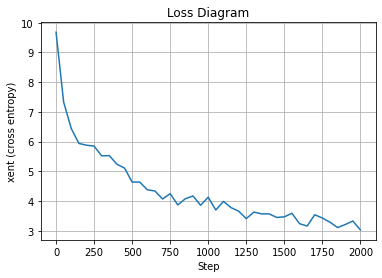

In [10]:
import matplotlib.pyplot as plt
import numpy as np

xent = [9.68, 7.33, 6.44, 5.94, 5.88, 5.85, 5.52, 5.53, 5.24, 5.11, 4.64, 4.64, 4.38, 4.34, 4.07, 4.25, 3.87, 4.08, 4.17, 3.86, 4.13, 3.7, 3.99, 3.78, 3.66, 3.41, 3.63, 3.57, 3.57, 3.45, 3.47, 3.59, 3.24, 3.16, 3.54 , 3.43, 3.29, 3.11, 3.21, 3.33, 3.03]
t = np.arange(0, len(xent)*50, 50)

fig, ax = plt.subplots()
ax.plot(t, xent)

ax.set(xlabel='Step', ylabel='xent (cross entropy)',
       title='Loss Diagram')
ax.grid()

fig.savefig("test.png")
plt.show()